In [1]:


import pandas as pd
#from pandas.tools.plotting import scatter_matrix
import numpy as np
# fixed random seed for reproducibility
np.random.seed(0)


import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,7
rcParams['axes.grid'] = True
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, average_precision_score


features = ['year', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't19', 't20', 't21', 't22', 't23', 't24', 't25', 't26', 't27', 't28', 't29', 't30', 't31', 't32', 't33', 't34', 't35', 't36', 't37', 't38', 't39', 't40', 't41', 't42', 't43', 't44', 't45', 't46', 't47', 't48', 't49', 't50', 't51', 't52', 't53' , 't54', 't55', 't56', 't57', 't58', 't59', 't60', 't61', 't62', 't63', 't64', 't65', 't66', 't67', 't68', 't69', 't70', 't71', 't72', 't73', 't74', 't75', 't76', 't77', 't78', 't79', 't80', 't81', 't82', 't83', 't84', 't85', 't86', 't87', 't88', 't89', 't90']

# Note that our classes (which we have to predict from those 90 features), are all
# the years from 1922 to 2011: 1922, 1923, 1924, 1925, ..., 2011
# Theare exactly 90 years, so we also have 90 classes:
nb_classes = 90

# reading the data
filename = "YearPredictionMSD.txt"
data = pd.read_csv(filename, header = None, names = features)
X = np.array(data.drop(['year'], axis=1))
y = np.array(data['year'])

# data normalizations (scaling down all values to the interval [0,1])
# The years 1922-2011 are scaled down to integers [0,1,2,..., 89] 
a = X.min()
b = X.max()
X = (X - a) / (b - a)  # all values now between 0 and 1 !
y = y - y.min() 

# creating a new data frame of normalized data
data_nrm = pd.DataFrame(X, columns=features[1:] )
data_nrm["year"]=y

data_nrm.head()

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t82,t83,t84,t85,t86,t87,t88,t89,t90,year
0,0.185014,0.184660,0.185301,0.184503,0.184178,0.184232,0.184084,0.184242,0.184491,0.184363,...,0.183719,0.185126,0.184585,0.184408,0.184108,0.185243,0.184371,0.184053,0.184422,79
1,0.184999,0.184623,0.185267,0.184555,0.184266,0.184086,0.184503,0.184383,0.184627,0.184451,...,0.184150,0.184804,0.184926,0.184271,0.183994,0.185269,0.184544,0.185119,0.184728,79
2,0.185026,0.184789,0.185087,0.184561,0.184312,0.184164,0.184353,0.184365,0.184593,0.184411,...,0.184717,0.183762,0.184530,0.184393,0.184930,0.182967,0.184393,0.184886,0.184386,79
3,0.184993,0.184371,0.184844,0.184426,0.184406,0.184069,0.184457,0.184266,0.184438,0.184315,...,0.182264,0.184184,0.183815,0.184239,0.185419,0.183500,0.184517,0.186871,0.184628,79
4,0.185026,0.184918,0.185227,0.184499,0.184197,0.184185,0.184239,0.184278,0.184551,0.184406,...,0.183700,0.185200,0.184174,0.184376,0.184301,0.185036,0.184492,0.185085,0.184751,79


In [2]:
# Training the model
# with all features
X_train = data_nrm.iloc[:,:-1][0:463715].to_numpy()
y_train = data_nrm["year"][0:463715].to_numpy()

# Validation data set
X_test = data_nrm.iloc[:,:-1][463715:].to_numpy()
y_test = data_nrm["year"][463715:].to_numpy()

In [6]:

## CASE3: usage of neural networks
import tensorflow as tf
from keras.models import Sequential
#from keras.layers.core import Dense, Dropout
from keras.layers import Dense, Activation, Flatten
from keras.models import load_model
from keras.regularizers import l2
from keras.utils import np_utils

# we will train the network with all the features at first
acc_thresh =0.9
# we will first go with a simple neural network of one input layer (90 or 75(features selection) neurons), one hidden layer and one output layer (90-100 neurons)
# for the hidden layer, we will put 100 neurons by choice

model_nn = Sequential()
model_nn.add(Dense(45, input_shape=(90,)))
model_nn.add(Dense(90,  activation='relu'))
model_nn.add(Dense(180,  activation='sigmoid'))
model_nn.add(Dense(100,  activation='relu'))
model_nn.add(Dense(90,  activation='softmax'))
#model_nn.add(Flatten())

#compiling the model
model_nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# because keras does not work with integer classes, we will change them to categorical type
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if (epoch % 100 ==0 ):
            print("epoch : ", epoch)
            print(logs)
        if(logs.get('accuracy') > acc_thresh):   
            print("\nWe have reached %2.2f%% accuracy, so we will stopping training." %(acc_thresh*100))   
            self.model.stop_training = True

from kerutils import *
from CodeMonitor.telegram import FitMonitor

mcallbacks = myCallback()
print (type(mcallbacks))
print(model_nn.summary())
#save_model_summary(model_NN, "model_nn_summary.txt")
#write_file("model_nn.json", model_nn.to_json())
#fmon = FitMonitor(thresh=0.09, minacc=0.999, filename="model_nn.h5")

h = model_nn.fit(
    X_train,
    Y_train,
    batch_size=128,
    epochs=1000,
    verbose=0,
    shuffle=True,
    validation_data=(X_test, Y_test),
    validation_batch_size=100,
    callbacks = [mcallbacks]
)

<class '__main__.myCallback'>
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 45)                4095      
                                                                 
 dense_12 (Dense)            (None, 90)                4140      
                                                                 
 dense_13 (Dense)            (None, 180)               16380     
                                                                 
 dense_14 (Dense)            (None, 100)               18100     
                                                                 
 dense_15 (Dense)            (None, 90)                9090      
                                                                 
Total params: 51,805
Trainable params: 51,805
Non-trainable params: 0
_________________________________________________________________
None
epoch :  0
{'lo

#### Random forest
encoding

In [3]:
# trying random classifier with all the features and instances
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std

In [ ]:


model = RandomForestClassifier(bootstrap=False)
model.fit(X_train, y_train)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


In [ ]:

n_scores = cross_val_score(model, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance


In [ ]:
# new


print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
pth = model.decision_path(X_test)
print(pth)
predictions = model.predict(X_test)


In [ ]:


print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
pth = model.decision_path(X_test)
print(pth)
predictions = model.predict(X_test)

In [21]:
mean_squared_error(y_test, predictions)

137.7998644199109

In [24]:
y_train.shape

(463715,)

In [6]:
# tuning parameters: changing some RF params
model2 = RandomForestClassifier(max_depth=5, n_estimators=500, bootstrap=True, oob_score=True)
model2.fit(X_train, y_train)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)



In [73]:
n_scores = cross_val_score(model2, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
pth = model2.decision_path(X_test)
#print(pth)
predictions = model2.predict(X_test)

Accuracy: 0.084 (0.002)


In [72]:
mean_squared_error(y_test, predictions)

188.45229517722254

In [ ]:
model2.oob_score_

In [ ]:
# model better without max depth
# tuning parameters: changing some RF params
model3 = RandomForestClassifier(n_estimators=200, bootstrap=True, oob_score=True)
model3.fit(X_train, y_train)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model3, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
pth = model3.decision_path(X_test)
#print(pth)
predictions = model3.predict(X_test)

mean_squared_error(y_test, predictions)


### Bucketing with Random Forest
instead of trying to predict the exact year, we will create buckets of year 

In [ ]:
# BUCKETING of the target variable 

# we will create 2 buckets, one for the left outliers, another for the right outliers and for the middle ones, buckets of 



In [27]:
# mean and std of the year target variable
y_mean = mean (y)
y_std = std (y)

print(y_mean , y_std )

76.39708156671745 10.9310357487649


In [28]:
# so we know the mean is 76.36 and std is 10.93
# we want to create a bucket for left outliers (2std) and one for the right ouliers



In [29]:
# print(int(y_mean -2*y_std), int(y_mean+(y_std*2)))

# so for the in between buckets, the min will be 54 and max 98>89; 89-54 =35
# we want to put an interval of 5 years per bucket, so 7 buckets total

In [30]:
#data = np.random.randint(low=1, high=10001, size=1000)                 

df = pd.DataFrame(data=y, columns=["years"])
a = int(y_mean -2*y_std)
bins = np.array([-1,a,a+5,a+10,a+15,a+20,a+25,a+30,a+35])

print(bins)

df["bucket"] = pd.cut(df.years, bins)
df.head(5) 



[-1 54 59 64 69 74 79 84 89]


,years,bucket
0,79,"(74, 79]"
1,79,"(74, 79]"
2,79,"(74, 79]"
3,79,"(74, 79]"
4,79,"(74, 79]"


In [32]:
# so now that we have created buckets, we are going to run RF and Gradient boosting regression on those buckets instead

y_train_buck = df["bucket"][0:463715].to_numpy()
y_test_buck = df["bucket"][463715:].to_numpy()



In [33]:
# encoding the intervals
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [34]:
label_encoder = LabelEncoder()
y_train_buck_en = label_encoder.fit_transform(y_train_buck)
y_test_buck_en = label_encoder.fit_transform(y_test_buck)


In [38]:
model_buck = RandomForestClassifier(bootstrap=False)
model_buck.fit(X_train, y_train_buck_en)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


n_scores = cross_val_score(model_buck, X_test, y_test_buck_en, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
pth = model_buck.decision_path(X_test)
print(pth)
predictions = model_buck.predict(X_test)

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
pth = model_buck.decision_path(X_test)
print(pth)
predictions = model_buck.predict(X_test)

mean_squared_error(y_test_buck_en, predictions)


Accuracy: 0.389 (0.006)
(<51630x35753868 sparse matrix of type '<class 'numpy.int64'>'
	with 122761356 stored elements in Compressed Sparse Row format>, array([       0,   357799,   715272,  1072507,  1430052,  1788535,
        2145990,  2502909,  2860270,  3217655,  3575392,  3933103,
        4290272,  4648153,  5005826,  5363013,  5720510,  6078567,
        6436078,  6794511,  7152578,  7510783,  7867650,  8225861,
        8583420,  8939573,  9296886,  9653153, 10010864, 10368501,
       10726838, 11084221, 11442222, 11799877, 12157428, 12515273,
       12872708, 13230405, 13587408, 13944099, 14301290, 14657887,
       15015746, 15373931, 15731986, 16089165, 16446310, 16803979,
       17161610, 17518705, 17874332, 18232593, 18590726, 18948671,
       19306998, 19665701, 20023692, 20381015, 20738996, 21096009,
       21453626, 21810231, 22167164, 22525401, 22883370, 23240693,
       23598592, 23955789, 24314716, 24672583, 25030258, 25387025,
       25745174, 26102101, 26459440, 268169

4.293434049970947

In [37]:
y_train_buck.data

In [36]:
set(df["bucket"])

{Interval(-1, 54, closed='right'),
 Interval(54, 59, closed='right'),
 Interval(59, 64, closed='right'),
 Interval(64, 69, closed='right'),
 Interval(69, 74, closed='right'),
 Interval(74, 79, closed='right'),
 Interval(79, 84, closed='right'),
 Interval(84, 89, closed='right')}

In [37]:
df[pd.isna(df["bucket"])==True]

,years,bucket


In [16]:

print(y_train_buck)

[Interval(74.0, 79.0, closed='right') Interval(74.0, 79.0, closed='right')
 Interval(74.0, 79.0, closed='right') ...
 Interval(84.0, 89.0, closed='right') Interval(79.0, 84.0, closed='right')
 Interval(84.0, 89.0, closed='right')]


In [18]:
print(y_train_buck_en)

[5 5 5 ... 7 6 7]


/Users/vickyyounang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


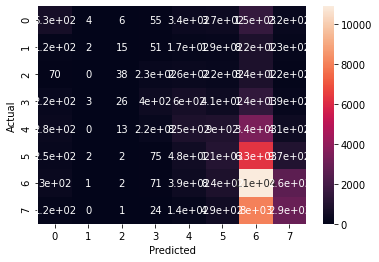

In [19]:
# ploting cm

import seaborn as sn
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(y_test_buck_en, predictions, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [20]:
y_test_buck_en

array([7, 6, 6, ..., 6, 6, 6])

In [21]:
predictions

array([6, 6, 6, ..., 7, 6, 6])

In [59]:
a = pd.DataFrame(sorted(np.unique(y_test_buck_en) ))
a["buckets"] = sorted(pd.unique(df["bucket"]))
a
#df.nunique()

,0,buckets
0,0,"(-1, 54]"
1,1,"(54, 59]"
2,2,"(59, 64]"
3,3,"(64, 69]"
4,4,"(69, 74]"
5,5,"(74, 79]"
6,6,"(79, 84]"
7,7,"(84, 89]"


In [ ]:
# RF with buckets while removing the outliers 

In [62]:
predictions

array([7, 6, 6, ..., 6, 6, 6])

In [ ]:
# bucketing with tuned parameters
model_buck2 = RandomForestClassifier( n_estimators=500, bootstrap=True, oob_score=True)
model_buck2.fit(X_train, y_train_buck_en)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


n_scores = cross_val_score(model_buck2, X_test, y_test_buck_en, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
pth = model_buck2.decision_path(X_test)
print(pth)
predictions = model_buck2.predict(X_test)

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
pth = model_buck2.decision_path(X_test)
print(pth)
predictions = model_buck2.predict(X_test)

mean_squared_error(y_test_buck_en, predictions)